In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_clean.csv")

In [4]:
pd.set_option("display.max_colwidth",None,"display.max_columns",None)

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Normlisasi dan Standarisasi

mari cek apakah kolom numerikal itu distribusi normal atau tidak

In [6]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

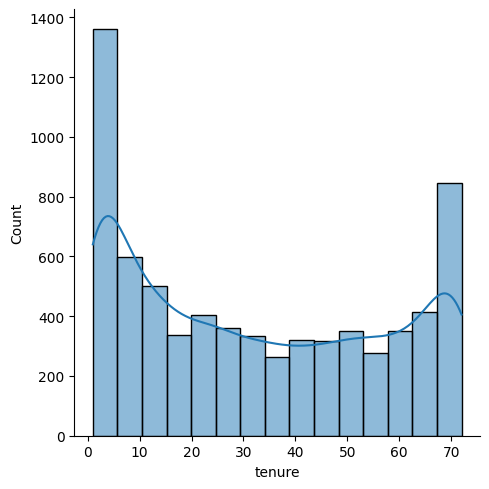

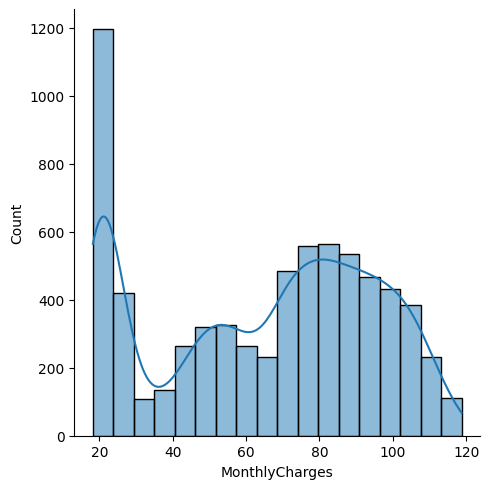

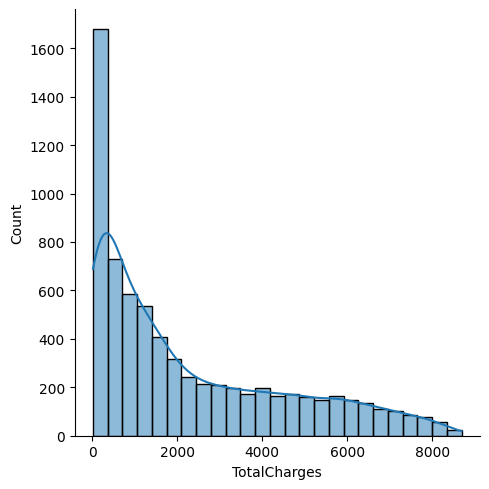

In [7]:
for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

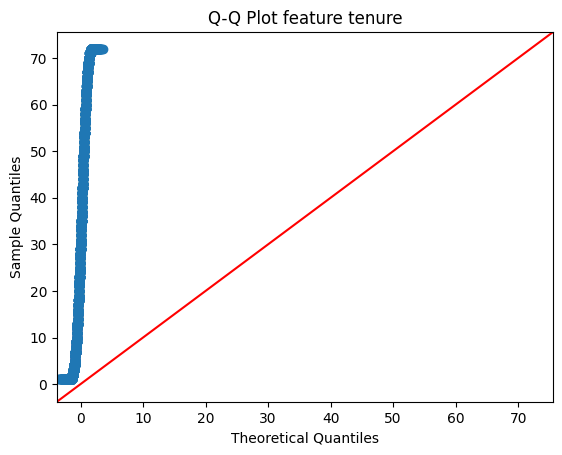

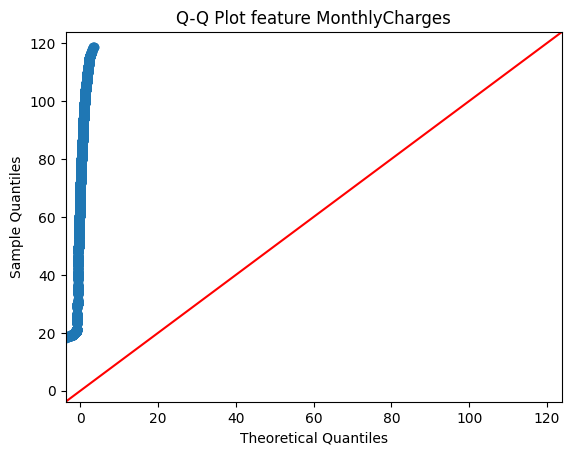

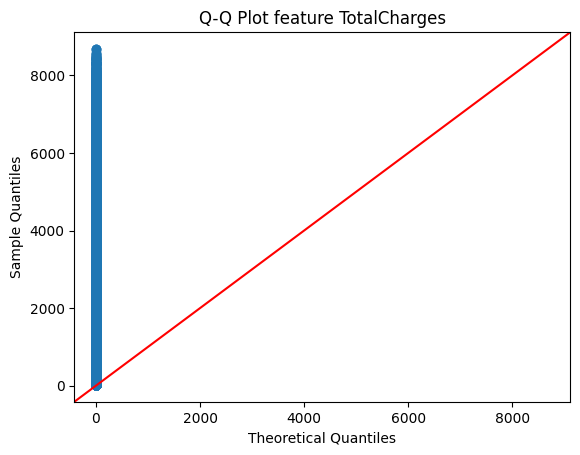

In [8]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot feature {i}")
  plt.show()

Karena bukan distribusi normal, maka kita akan lakukan Normalisasi

kita akan menggunakan Z-Score Normalization karena ini cocok untuk data yang distribusinya tidak diketahui

In [9]:
Numerikal.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
scaler = StandardScaler()
df["tenure"] = pd.DataFrame(scaler.fit_transform(df[["tenure"]]), columns=["tenure"])

In [11]:
df["MonthlyCharges"] = pd.DataFrame(scaler.fit_transform(df[["MonthlyCharges"]]), columns=["MonthlyCharges"])

In [12]:
df["TotalCharges"] = pd.DataFrame(scaler.fit_transform(df[["TotalCharges"]]), columns=["TotalCharges"])

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


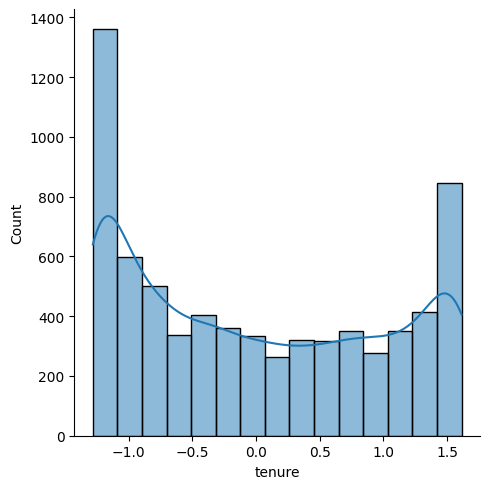

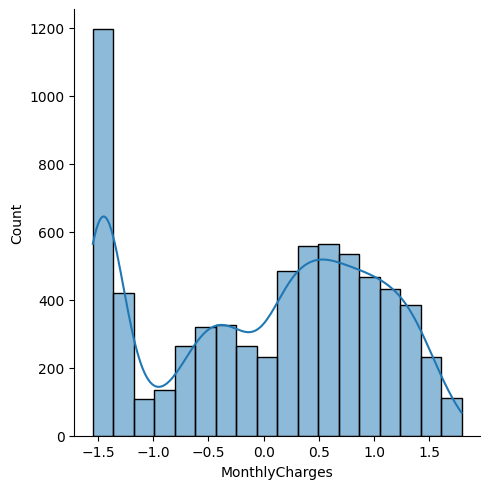

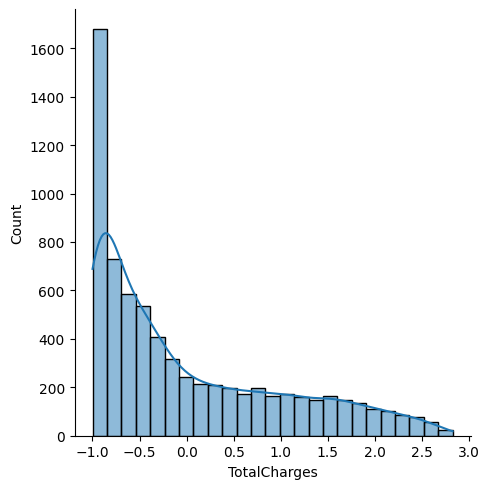

In [14]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

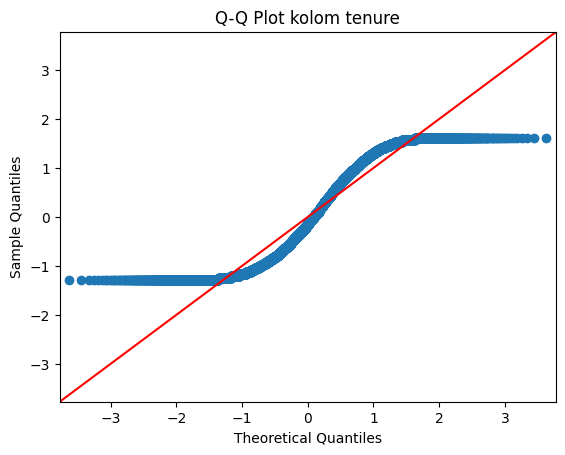

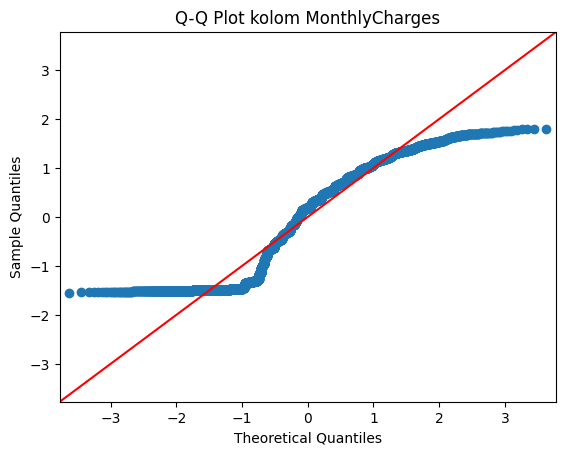

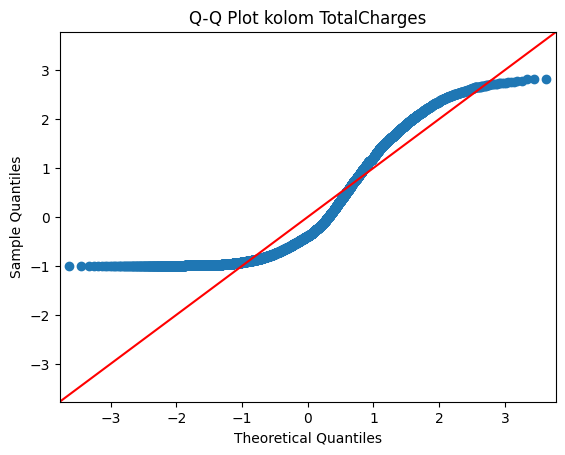

In [15]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot kolom {i}")
  plt.show()

berdasarkan qq plot..sudah distribusi normal

# Feature encoding

In [16]:
Kategorikal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [17]:
gender = pd.get_dummies(df["gender"])
gender = gender.astype(int)

In [18]:
gender

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7027,0,1
7028,1,0
7029,1,0
7030,0,1


In [19]:
gender.rename(columns={"Male":"Gender Male",
                       "Female":"Gender Female"},inplace=True)

In [20]:
gender

,Gender Female,Gender Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7027,0,1
7028,1,0
7029,1,0
7030,0,1


In [21]:
SeniorCitizen = pd.get_dummies(df["SeniorCitizen"])
SeniorCitizen = SeniorCitizen.astype(int)

In [22]:
SeniorCitizen

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,1,0
7028,1,0
7029,1,0
7030,0,1


In [23]:
SeniorCitizen.rename(columns={1:"Is SeniorCitizen",
                              0:"Not a SeniorCitizen"},inplace=True)

In [24]:
SeniorCitizen

,Not a SeniorCitizen,Is SeniorCitizen
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,1,0
7028,1,0
7029,1,0
7030,0,1


In [25]:
Partner = pd.get_dummies(df["Partner"])
Partner = Partner.astype(int)

In [26]:
Partner

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [27]:
Partner.rename(columns={"Yes":"Have Partner",
                        "No":"Not Have Partner"},inplace=True)

In [28]:
Partner

,Not Have Partner,Have Partner
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [29]:
Dependents = pd.get_dummies(df["Dependents"])
Dependents = Dependents.astype(int)

In [30]:
Dependents

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,1,0


In [31]:
Dependents.rename(columns={"Yes":"Have Dependents",
                           "No":"Not Have Dependets"},inplace=True)

In [32]:
Dependents

,Not Have Dependets,Have Dependents
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,1,0


In [33]:
PhoneService = pd.get_dummies(df["PhoneService"])
PhoneService = PhoneService.astype(int)

In [34]:
PhoneService

,No,Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,1,0
7030,0,1


In [35]:
PhoneService.rename(columns={"Yes":"Have PhoneService",
                             "No":"Not Have PhoneService"},inplace=True)

In [36]:
PhoneService

,Not Have PhoneService,Have PhoneService
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,1,0
7030,0,1


In [37]:
MultipleLines = pd.get_dummies(df["MultipleLines"])
MultipleLines = MultipleLines.astype(int)

In [38]:
MultipleLines

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,0,1,0
7030,0,0,1


In [39]:
MultipleLines.rename(columns={"Yes":"Have MultipleLines",
                             "No":"Not Have MultipleLines",
                              "No phone service":"Not have phone service"},inplace=True)

In [40]:
MultipleLines

,Not Have MultipleLines,Not have phone service,Have MultipleLines
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,0,1,0
7030,0,0,1


In [41]:
InternetService = pd.get_dummies(df["InternetService"])
InternetService = InternetService.astype(int)

In [42]:
InternetService

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7027,1,0,0
7028,0,1,0
7029,1,0,0
7030,0,1,0


In [43]:
InternetService.rename(columns={"Fiber optic":"Using Fiber optic as InternetService",
                               "DSL":"Using DSL as InternetService",
                                "No":"Not have InternetService"},inplace=True)

In [44]:
InternetService

,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7027,1,0,0
7028,0,1,0
7029,1,0,0
7030,0,1,0


In [45]:
OnlineSecurity = pd.get_dummies(df["OnlineSecurity"])
OnlineSecurity = OnlineSecurity.astype(int)

In [46]:
OnlineSecurity

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,0,0,1
7030,1,0,0


In [47]:
OnlineSecurity.rename(columns={"Yes":"Have OnlineSecurity",
                               "No":"Not Have OnlineSecurity",
                               "No internet service":"Not have internet service(OnlineSecurity)"},inplace=True)

In [48]:
OnlineSecurity

,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,0,0,1
7030,1,0,0


In [49]:
OnlineBackup = pd.get_dummies(df["OnlineBackup"])
OnlineBackup = OnlineBackup.astype(int)

In [50]:
OnlineBackup

,No,No internet service,Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7027,1,0,0
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [51]:
OnlineBackup.rename(columns={"No":"Not Have OnlineBackup",
                            "Yes":"Have OnlineBackup",
                             "No internet service":"Not have internet service(OnlineBackup)"},inplace=True)
OnlineBackup

,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7027,1,0,0
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [52]:
DeviceProtection = pd.get_dummies(df["DeviceProtection"])
DeviceProtection = DeviceProtection.astype(int)

In [53]:
DeviceProtection

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [54]:
DeviceProtection.rename(columns={"No":"Not Have DeviceProtection",
                                "Yes":"Have DeviceProtection",
                                 "No internet service":"Not Have internet service(DeviceProtection)"},inplace=True)
DeviceProtection

,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [55]:
TechSupport = pd.get_dummies(df["TechSupport"])
TechSupport = TechSupport.astype(int)

In [56]:
TechSupport

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,1,0,0
7030,1,0,0


In [57]:
TechSupport.rename(columns={"No":"Not have TechSupport",
                           "Yes":"Have TechSupport",
                            "No internet service":"Not Have internet service(TechSupport)"},inplace=True)
TechSupport

,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,1,0,0
7030,1,0,0


In [58]:
StreamingTV = pd.get_dummies(df["StreamingTV"])
StreamingTV = StreamingTV.astype(int)

In [59]:
StreamingTV

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [60]:
StreamingTV.rename(columns={"No":"Not have StreamingTV",
                           "Yes":"Have StreamingTV",
                            "No internet service":"Not Have internet service(StreamingTV)"},inplace=True)
StreamingTV

,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [61]:
StreamingMovies = pd.get_dummies(df["StreamingMovies"])
StreamingMovies = StreamingMovies.astype(int)
StreamingMovies

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [62]:
StreamingMovies.rename(columns={"No":"Not have StreamingMovies",
                           "Yes":"Have StreamingMovies",
                                "No internet service":"Not Have internet service(StreamingMovies)"},inplace=True)
StreamingMovies

,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [63]:
Contract = pd.get_dummies(df["Contract"])
Contract = Contract.astype(int)
Contract

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,1,0
7028,0,1,0
7029,1,0,0
7030,1,0,0


In [64]:
PaperlessBilling = pd.get_dummies(df["PaperlessBilling"])
PaperlessBilling = PaperlessBilling.astype(int)
PaperlessBilling

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [65]:
PaperlessBilling.rename(columns={"Yes":"Using PaperlessBilling",
                                 "No":"Not Using PaperlessBilling"},inplace=True)
PaperlessBilling

,Not Using PaperlessBilling,Using PaperlessBilling
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [66]:
PaymentMethod = pd.get_dummies(df["PaymentMethod"])
PaymentMethod = PaymentMethod.astype(int)
PaymentMethod

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7027,0,0,0,1
7028,0,1,0,0
7029,0,0,1,0
7030,0,0,0,1


In [67]:
df = pd.concat([df,gender, SeniorCitizen, Partner, Dependents, PhoneService,
       MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
       DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
       Contract, PaperlessBilling, PaymentMethod],axis=1)

In [68]:
df.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   customerID                                   7032 non-null   object 
 1   tenure                                       7032 non-null   float64
 2   MonthlyCharges                               7032 non-null   float64
 3   TotalCharges                                 7032 non-null   float64
 4   Churn                                        7032 non-null   object 
 5   Gender Female                                7032 non-null   int64  
 6   Gender Male                                  7032 non-null   int64  
 7   Not a SeniorCitizen                          7032 non-null   int64  
 8   Is SeniorCitizen                             7032 non-null   int64  
 9   Not Have Partner                             7032 non-null   int64  
 10  

# Dimensionality Reduction

## Feature Selection

In [70]:
df.drop(columns=["customerID"],inplace=True)

In [71]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [72]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,Gender Female,Gender Male,Not a SeniorCitizen,Is SeniorCitizen,Not Have Partner,Have Partner,Not Have Dependets,Have Dependents,Not Have PhoneService,Have PhoneService,Not Have MultipleLines,Not have phone service,Have MultipleLines,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies,Month-to-month,One year,Two year,Not Using PaperlessBilling,Using PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,-1.280248,-1.161694,-0.994194,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7028,1.612573,1.276493,2.241056,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7029,-0.872808,-1.170004,-0.854514,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7030,-1.158016,0.319168,-0.872095,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [73]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [74]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [75]:
X

,tenure,MonthlyCharges,TotalCharges,Gender Female,Gender Male,Not a SeniorCitizen,Is SeniorCitizen,Not Have Partner,Have Partner,Not Have Dependets,Have Dependents,Not Have PhoneService,Have PhoneService,Not Have MultipleLines,Not have phone service,Have MultipleLines,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies,Month-to-month,One year,Two year,Not Using PaperlessBilling,Using PaperlessBilling,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,-1.280248,-1.161694,-0.994194,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7028,1.612573,1.276493,2.241056,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7029,-0.872808,-1.170004,-0.854514,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7030,-1.158016,0.319168,-0.872095,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [76]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [77]:
mi = SelectKBest(mutual_info_classif, k="all")

In [78]:
mi.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7defc54c32e0>)

In [79]:
feature_mi_score = pd.Series(mi.scores_, index=X.columns)

In [80]:
feature_mi_score.sort_values(ascending=False)

Month-to-month                                 0.089605
tenure                                         0.075349
Not Have OnlineSecurity                        0.067805
Not have TechSupport                           0.050978
Two year                                       0.049969
Using Fiber optic as InternetService           0.049653
MonthlyCharges                                 0.048064
TotalCharges                                   0.042772
Not Have OnlineBackup                          0.038615
Electronic check                               0.037438
Not have internet service(OnlineSecurity)      0.033266
Not have internet service(OnlineBackup)        0.032888
Not Have DeviceProtection                      0.029768
Not Have internet service(StreamingTV)         0.029350
Not have InternetService                       0.028920
Not Have internet service(TechSupport)         0.028888
Not Have internet service(StreamingMovies)     0.028328
Not Have internet service(DeviceProtection)    0

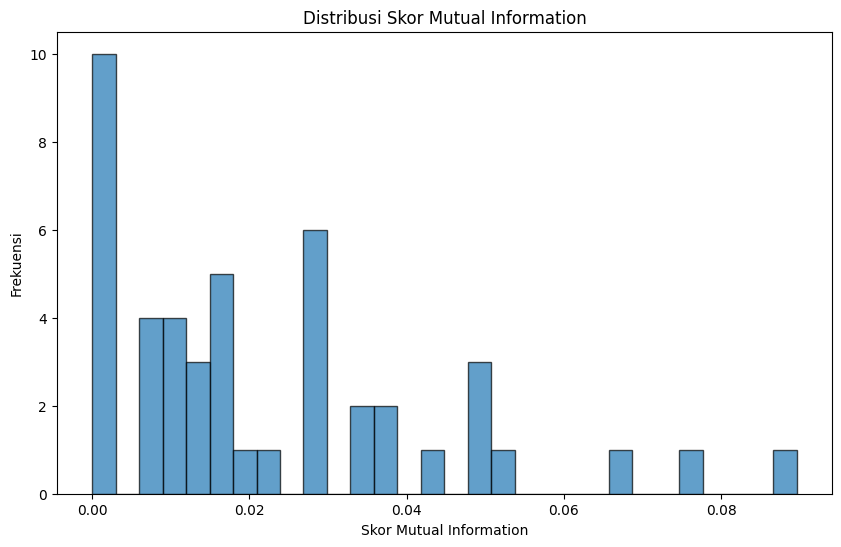

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(feature_mi_score, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribusi Skor Mutual Information')
plt.xlabel('Skor Mutual Information')
plt.ylabel('Frekuensi')
plt.show()

In [82]:
threshold = 0.04

In [83]:
selected_features = feature_mi_score[feature_mi_score > threshold]

In [84]:
selected_features

tenure                                  0.075349
MonthlyCharges                          0.048064
TotalCharges                            0.042772
Using Fiber optic as InternetService    0.049653
Not Have OnlineSecurity                 0.067805
Not have TechSupport                    0.050978
Month-to-month                          0.089605
Two year                                0.049969
dtype: float64

In [85]:
selected_features.shape

(8,)

In [86]:
selected_features_df = df[selected_features.index]

In [87]:
selected_features_df

,tenure,MonthlyCharges,TotalCharges,Using Fiber optic as InternetService,Not Have OnlineSecurity,Not have TechSupport,Month-to-month,Two year
0,-1.280248,-1.161694,-0.994194,0,1,1,1,0
1,0.064303,-0.260878,-0.173740,0,0,1,0,0
2,-1.239504,-0.363923,-0.959649,0,0,1,1,0
3,0.512486,-0.747850,-0.195248,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,1,1,1,0
...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,0,0,0,0
7028,1.612573,1.276493,2.241056,1,1,1,0,0
7029,-0.872808,-1.170004,-0.854514,0,0,1,1,0
7030,-1.158016,0.319168,-0.872095,1,1,1,1,0


## Feature extraction

PCA tidak optimal untuk klasifikasi

LDA lebih cocok untuk klasifikasi, dalam kasus ini churn, tapi syaratnya data perlu asumsi normalitas dan homogenitas varians antara kelas.

untuk awalan kita tidak akan melakuakn Feature extraction terlebih dahulu.

# Modeling random forest

## Baseline model

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(random_state=42)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = selected_features_df
y = df["Churn"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
y_pred = rf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [96]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7697228144989339
Precision: 0.5822368421052632
Recall: 0.4732620320855615
F1-score: 0.5221238938053098
Confusion matriks: 
 [[906 127]
 [197 177]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.47      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [97]:
from sklearn.metrics import roc_curve, auc

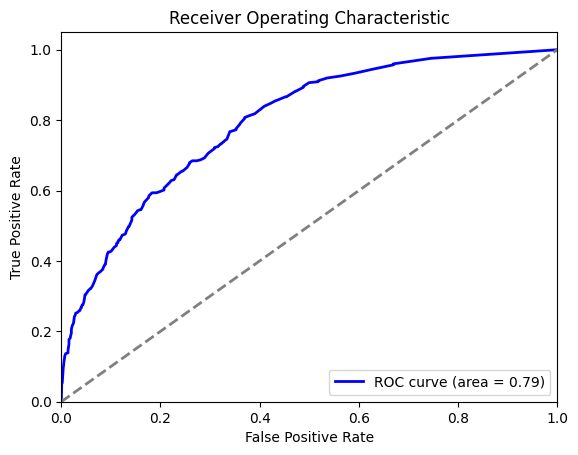

In [98]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [99]:
from sklearn.model_selection import learning_curve, StratifiedKFold

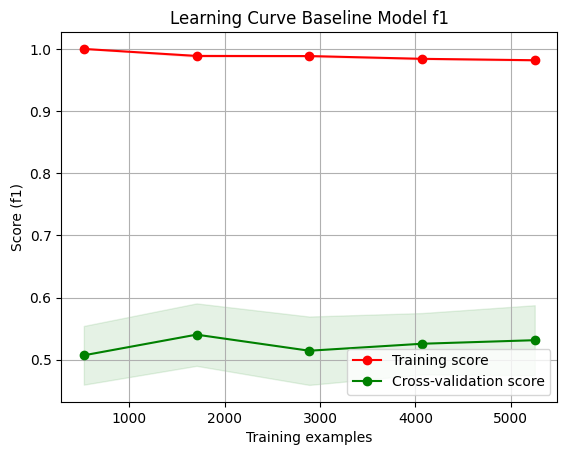

In [100]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

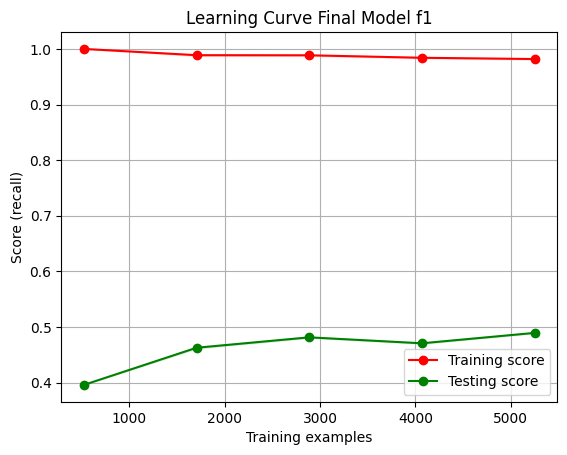

In [101]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [102]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

f1 test: 0.5390279823269514
f1 train: 0.9527665317139001


## Model Performance Curves

### max_depth

In [103]:
from sklearn.model_selection import cross_val_score

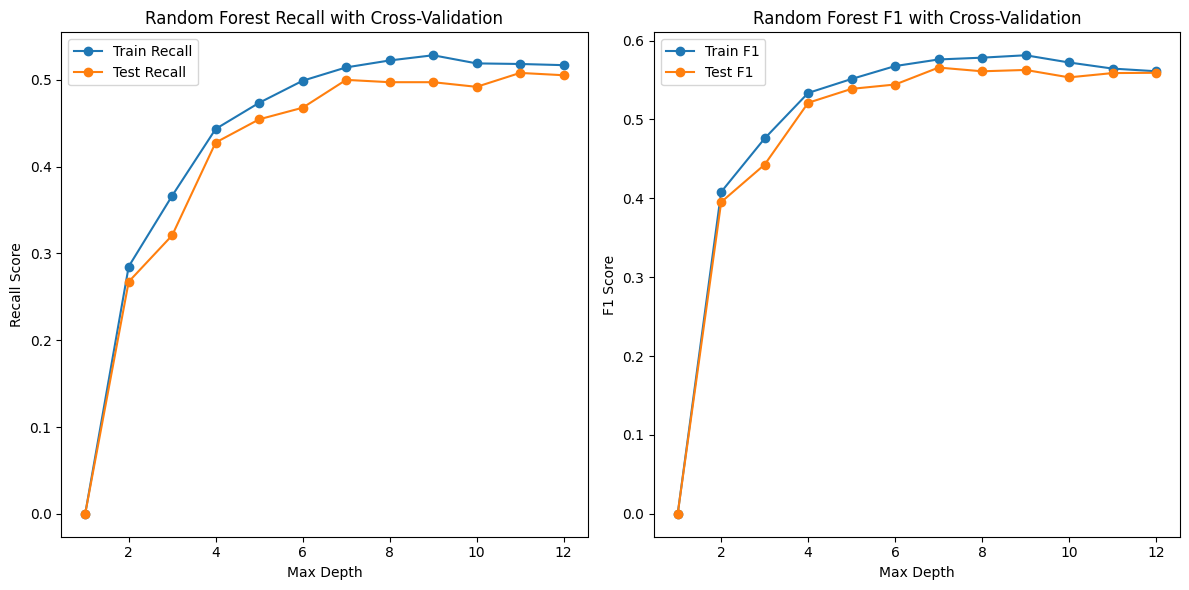

In [104]:
values = [i for i in range(1, 13)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(max_depth=i, random_state=42, n_jobs=-1)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("Max Depth")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_split

In [ ]:
values = [i for i in range(2, 30)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_split=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples split")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples split")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_leaf

In [ ]:
values = [i for i in range(1, 21)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples leaf")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

## Hyperparamter tunning

In [ ]:
parah_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3,4,5,6],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

In [ ]:
!pip install scikit-optimize

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parah_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

## Evaluasi model hyperparameter tunning

In [ ]:
rf = RandomForestClassifier(
    bootstrap = False,
    random_state=42,
    max_depth = 6,
    max_features = "sqrt",
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators = 200)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

Selisih sekitar 0.0802 atau 8.02% antara F1-score pada data latih dan data uji menunjukkan bahwa model memiliki performa yang sedikit lebih baik pada data latih dibandingkan pada data uji. Namun, selisih ini masih dalam rentang yang bisa dianggap normal dan tidak menunjukkan overfitting yang parah.

mari cari skorr dengan nilai yang lebih tinggi

# Dimensionality Reduction lanjutan

## Feature extraction

LDA adalah teknik pengurangan dimensi yang mencari proyeksi linear dari data yang memaksimalkan separasi antar kelas. LDA sering digunakan dalam masalah klasifikasi.

mari kita coba LDA

In [ ]:
selected_features_df

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)
# min(n_features, n_classes - 1)
# min(10, 2 - 1 )

In [ ]:
X_lda = lda.transform(selected_features_df)

In [ ]:
X_lda.shape

In [ ]:
X_lda

In [ ]:
df_lda = pd.DataFrame(X_lda, columns=['LD'])

In [ ]:
df_lda

# Modeling baru

## Baseline model

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
X = df_lda
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

## Model Performance Curves

### max_depth

In [ ]:
values = [i for i in range(1, 13)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(max_depth=i, random_state=42, n_jobs=-1)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("Max Depth")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_split

In [ ]:
values = [i for i in range(2, 30)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_split=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples split")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples split")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

### min_samples_leaf

In [ ]:
values = [i for i in range(1, 21)]
train_recalls, test_recalls = list(), list()
train_f1s, test_f1s = list(), list()

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

for i in values:
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)

    train_recalls_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
    train_recall = train_recalls_cv.mean()
    train_recalls.append(train_recall)

    train_f1s_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")
    train_f1 = train_f1s_cv.mean()
    train_f1s.append(train_f1)

    model.fit(X_train, y_train)
    test_yhat = model.predict(X_test)

    test_recall = recall_score(y_test, test_yhat)
    test_recalls.append(test_recall)

    test_f1 = f1_score(y_test, test_yhat)
    test_f1s.append(test_f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(values, train_recalls, "-o", label="Train Recall")
plt.plot(values, test_recalls, "-o", label="Test Recall")
plt.xlabel("min samples leaf")
plt.ylabel("Recall Score")
plt.legend()
plt.title("Random Forest Recall with Cross-Validation")

plt.subplot(1, 2, 2)
plt.plot(values, train_f1s, "-o", label="Train F1")
plt.plot(values, test_f1s, "-o", label="Test F1")
plt.xlabel("min samples leaf")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Random Forest F1 with Cross-Validation")

plt.tight_layout()
plt.show()

## hyperparameter tunning

In [ ]:
parah_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1],
    'min_samples_split': [10],
    'min_samples_leaf': [2,3],
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parah_grid,
    n_iter=50,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1)

random_search.fit(X_train, y_train)

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

## Evaluasi model hyper parameter tunning

In [ ]:
rf = RandomForestClassifier(
    bootstrap = True,
    random_state=42,
    max_depth = 1,
    max_features = "sqrt",
    min_samples_leaf = 2,
    min_samples_split = 10,
    n_estimators = 500)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matriks: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=cv, scoring="f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve Baseline Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (f1)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=cv, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

test_recall_scores = []
for i, size in enumerate(train_sizes):
    rf.fit(X_train[:size], y_train[:size])
    test_recall_score = recall_score(y_test, rf.predict(X_test))
    test_recall_scores.append(test_recall_score)

test_recall_scores = np.array(test_recall_scores)

plt.figure()
plt.title("Learning Curve Final Model f1")
plt.xlabel("Training examples")
plt.ylabel("Score (recall)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_recall_scores - train_scores_std,
                 test_recall_scores + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_recall_scores, 'o-', color="g",
         label="Testing score")

plt.legend(loc="best")
plt.show()

- Training Score (Garis Merah): Skor pada data latih menunjukkan penurunan yang konsisten saat ukuran data latih meningkat. Hal ini biasanya diharapkan karena semakin banyak data yang digunakan untuk melatih model, semakin sulit bagi model untuk overfit.

- Testing Score (Garis Hijau): Skor pada data uji menunjukkan peningkatan saat ukuran data latih meningkat, yang merupakan indikasi bahwa model dapat generalisasi lebih baik dengan lebih banyak data.

In [ ]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("f1 test:", f1_score(y_test, y_pred_test))
print("f1 train:", f1_score(y_train, y_pred_train))

Selisih antara skor F1 pada data uji dan data latih adalah sekitar 0.0172, yang relatif kecil dan menunjukkan bahwa model memiliki keseimbangan yang baik antara bias dan variansi.

Berdasarkan learning curve, kita dapat melihat bahwa performa model meningkat dengan lebih banyak data, dan perbedaan antara training score dan testing score tidak terlalu besar, yang menunjukkan bahwa model tidak overfitting secara signifikan.

sejauh ini, ini yang paling bagus

### Export dataset

In [ ]:
"""import os
df.to_csv("TelcoChurn_prep.csv", index=False)
print(os.listdir('.'))"""